Сегодня мы аналитики популярной сети фитнес-клубов, которая предлагает несколько видов тренировок.

Первая тренировка в наших клубах всегда бесплатная.

- У нас есть данные об оплатах тренировок — **payments.xlsx**
- У нас есть данные о посещении тренировок — **workouts.csv**
- У нас есть данные о членах клуба — **users.xlsx**


In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
workouts = pd.read_csv('workouts.csv') # подключимся к данным по тренировкам

workouts

,workout_id,cost,start_at,status,workout_schedule_type,client_id,client_status,workout_type,trainer_department,trainer_id
0,30793909,NaN,2020-11-13 12:45:00,success,trial,22034,NaN,general,Sales,10722051
1,31123309,750.0,2020-11-21 13:00:00,success,regular,22034,new,general,Spartacus,940642
2,31412167,750.0,2020-11-28 13:00:00,success,regular,22034,new,general,Spartacus,940642
3,31703605,750.0,2020-12-05 13:00:00,success,regular,22034,active,general,Spartacus,940642
4,26904500,NaN,2020-08-06 18:20:00,success,trial,88101,NaN,general,Sales,3826530
...,...,...,...,...,...,...,...,...,...,...
104688,30976738,750.0,2020-11-19 08:00:00,success,single,4831015,active,general,Spartacus,6684752
104689,31118199,750.0,2020-11-21 11:00:00,success,regular,4831015,active,general,Spartacus,6684752
104690,31118238,750.0,2020-11-26 08:00:00,success,single,4831015,active,general,Spartacus,6684752
104691,31600293,750.0,2020-12-03 08:00:00,success,regular,4831015,active,general,Spartacus,6684752


In [4]:
payments = pd.read_excel('payments.xlsx') # подключимся к данным по оплатам

payments


,user_id,payment_id,workout_type,amount,payment_date
0,132815,1535249,general,10337.768848,2020-01-30 15:03:59
1,165987,2395447,general,9711.925350,2020-08-18 21:59:09
2,17364,2641443,general,8951.474487,2020-10-12 11:55:00
3,148617,2402771,general,9981.884731,2020-08-20 21:30:27
4,175413,2035719,general,8848.691858,2020-05-22 20:10:55
...,...,...,...,...,...
11357,2356776,2619479,general,10437.768848,2020-10-07 13:01:24
11358,4632805,1718214,general,9051.474487,2020-03-22 23:26:54
11359,1708369,1643206,general,8358.327307,2020-03-02 16:44:36
11360,3448563,2101873,general,9909.902803,2020-06-06 12:25:38


In [5]:
workouts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104693 entries, 0 to 104692
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   workout_id             104693 non-null  int64  
 1   cost                   100012 non-null  float64
 2   start_at               104693 non-null  object 
 3   status                 104693 non-null  object 
 4   workout_schedule_type  104693 non-null  object 
 5   client_id              104693 non-null  int64  
 6   client_status          100362 non-null  object 
 7   workout_type           104693 non-null  object 
 8   trainer_department     104676 non-null  object 
 9   trainer_id             104693 non-null  int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 8.0+ MB


In [6]:
workouts.describe(include = 'all')

,workout_id,cost,start_at,status,workout_schedule_type,client_id,client_status,workout_type,trainer_department,trainer_id
count,1.046930e+05,100012.000000,104693,104693,104693,1.046930e+05,100362,104693,104676,1.046930e+05
unique,NaN,NaN,8740,2,3,NaN,3,3,7,NaN
top,NaN,NaN,2020-10-01 19:00:00,success,regular,NaN,active,general,Spartacus,NaN
freq,NaN,NaN,70,82743,73901,NaN,81532,103492,81358,NaN
mean,2.592737e+07,820.706515,NaN,NaN,NaN,1.820669e+06,NaN,NaN,NaN,5.199522e+06
std,3.476346e+06,168.409824,NaN,NaN,NaN,1.267018e+06,NaN,NaN,NaN,2.790988e+06
min,1.814899e+07,500.000000,NaN,NaN,NaN,1.850000e+02,NaN,NaN,NaN,1.308000e+03
25%,2.309901e+07,750.000000,NaN,NaN,NaN,5.848360e+05,NaN,NaN,NaN,2.741049e+06
50%,2.592387e+07,750.000000,NaN,NaN,NaN,1.795450e+06,NaN,NaN,NaN,5.704876e+06
75%,2.897875e+07,1000.000000,NaN,NaN,NaN,2.746134e+06,NaN,NaN,NaN,7.358521e+06


In [7]:
users = pd.read_excel('users.xlsx')

In [8]:
users.describe()

,age,workouts_successful,workouts_total,months_active,user_id
count,2281.000000,4273.000000,4273.000000,4273.000000,4.273000e+03
mean,26.205612,24.324362,27.961619,4.783524,1.851355e+06
std,8.859393,22.898277,24.362613,3.153411,1.280512e+06
min,4.000000,1.000000,1.000000,1.000000,1.850000e+02
25%,20.000000,8.000000,10.000000,2.000000,6.210670e+05
50%,26.000000,16.000000,20.000000,4.000000,1.837866e+06
75%,32.000000,33.000000,38.000000,7.000000,2.786936e+06
max,68.000000,263.000000,285.000000,38.000000,5.511356e+06


**Задача:**

Сеть фитнес-клубов, для которых мы проводим аналитику, хочет увеличить конверсию в первую оплату и выстроить работу отдела продаж, основываясь на данных, а не только интуиции сейлз-менеджеров.


Руководитель сети хочет посмотреть, как быстро совершают покупку те, кто пришли на бесплатную тренировку, то есть время конверсии в первую оплату. 

Можно смотреть на эту метрику, чтобы понять, когда человека пора «догревать»  промокодами и звонить ему, а когда надо просто подождать пока он сам оплатит.



#### Что нужно для решения этой задачи

1. Перевести даты оплат из строкового формата
2. Сгруппировать данные и агрегировать их 
3. Объединить несколько таблиц в одну
4. Создать новые колонки и произвести расчет



**Мы хотим рассчитать среднее время конверсии из бесплатной тренировки в платную**

➡️Нужно перевести даты оплат и тренировок из строкового формата в `datetime`, чтобы мы смогли оперировать ими как датами

In [9]:
payments['payment_date'] = pd.to_datetime(payments['payment_date'])


In [10]:
workouts['start_at'] = pd.to_datetime(workouts['start_at'])

✅Мы перевели все необходимые даты, которые будем сравнивать, в нужный формат. 

Теперь нам нужно научиться группировать данные, потому что клиенты нашей сети покупают много абонементов и ходят на тренировки по нескольку лет. А мы хотим исследовать только их самый ранний опыт первых покупок и посещений.


➡️Нужно получить дату первой бесплатной тренировки и дату первой оплаты. То есть найти минимальную дату оплаты и тренировки для каждого пользователя.

#### Как посчитать дату первой оплаты?

1. создадим переменную, в которой будет датафрейм только с первыми оплатами
2. вызовем `.groupby()` для `user_id`
3. укажем, что хотим посчитать минимальное значение по колонке `payment_date`

In [11]:
# создали датафрейм, где каждому пользователю соответствует его дата первой оплаты
first_payments =  payments.groupby('user_id')['payment_date'].min() 
first_payments

user_id
185       2020-04-02 22:31:46
1455      2020-02-03 16:50:18
1558      2020-05-12 21:47:55
5312      2020-02-21 21:00:00
5804      2020-01-15 11:00:00
                  ...        
5460780   2020-01-20 19:14:44
5468992   2020-02-20 15:23:47
5477981   2020-09-03 15:41:26
5498391   2020-04-19 13:54:14
5511356   2020-04-28 12:28:45
Name: payment_date, Length: 4271, dtype: datetime64[ns]

Теперь нам нужно вычислить самый дату первой тренировки для каждого пользователя. 

Вычислим дату первой тренировки для каждого клиента:

1. Создаем переменную `first_workout`

2. Используем метод `.groupby()`, в качестве аргумента передайте `id` клиента

3. В квадратных скобках определим по какому столбцу мы будем группировать: мы ищем дату первой тренировки клиента

4. Используем функцию `.min()`, чтобы получить самую раннюю дату

In [12]:
first_workout = workouts.groupby('client_id')['start_at'].min()

In [13]:
first_workout

client_id
185       2020-02-25 20:20:00
1455      2020-01-28 16:20:00
1558      2020-05-12 21:00:00
5312      2020-02-21 20:20:00
5804      2020-01-15 10:20:00
                  ...        
5460780   2020-01-20 14:20:00
5468992   2020-02-20 11:00:00
5477981   2020-09-03 15:00:00
5498391   2020-04-19 13:00:00
5511356   2020-04-28 11:00:00
Name: start_at, Length: 4273, dtype: datetime64[ns]

✅Вычислили дату первой оплаты и дату первой тренировки!

Теперь нам нужно научиться объединять таблицы, чтобы первые оплаты и первые тренировки оказались в одном датафрейме.

➡️Нам нужно объединить в один датафрейм два получившихся датафрейма `first_payments` и `first_workout`

In [14]:
first_workout = first_workout.reset_index() 
first_payments = first_payments.reset_index()

In [15]:
user_info = pd.merge(first_payments, first_workout,
            how = 'inner',
            left_on = 'user_id', right_on= 'client_id')
user_info

,user_id,payment_date,client_id,start_at
0,185,2020-04-02 22:31:46,185,2020-02-25 20:20:00
1,1455,2020-02-03 16:50:18,1455,2020-01-28 16:20:00
2,1558,2020-05-12 21:47:55,1558,2020-05-12 21:00:00
3,5312,2020-02-21 21:00:00,5312,2020-02-21 20:20:00
4,5804,2020-01-15 11:00:00,5804,2020-01-15 10:20:00
...,...,...,...,...
4266,5460780,2020-01-20 19:14:44,5460780,2020-01-20 14:20:00
4267,5468992,2020-02-20 15:23:47,5468992,2020-02-20 11:00:00
4268,5477981,2020-09-03 15:41:26,5477981,2020-09-03 15:00:00
4269,5498391,2020-04-19 13:54:14,5498391,2020-04-19 13:00:00


✅Создали объединенный датафрейм с бесплатными тренировками и первыми оплатами

Теперь нам нужно научить добавлять новые колонки, чтобы добавить данные о времени конверсии для каждого клиента.

<center><img src="https://cdn.skyeng.ru/resources/image/skills/python/lesson1-1/3.png" /> 

➡️Нужно создать новую колонку с разницей между датами первого занятия и первой оплаты в новом объединенном датасете

Создайте новую колонку с разницей между датами первого занятия и первой оплаты в новом объединенном датасете

1. Назовем колонку `date_diff`

2. Вычтем из даты первой оплаты дату первого занятия

In [16]:
user_info['date_diff'] = user_info['payment_date'] - user_info['start_at']

In [17]:
user_info.head()

,user_id,payment_date,client_id,start_at,date_diff
0,185,2020-04-02 22:31:46,185,2020-02-25 20:20:00,37 days 02:11:46
1,1455,2020-02-03 16:50:18,1455,2020-01-28 16:20:00,6 days 00:30:18
2,1558,2020-05-12 21:47:55,1558,2020-05-12 21:00:00,0 days 00:47:55
3,5312,2020-02-21 21:00:00,5312,2020-02-21 20:20:00,0 days 00:40:00
4,5804,2020-01-15 11:00:00,5804,2020-01-15 10:20:00,0 days 00:40:00


✅Мы выяснили для каждого клиента разницу между датами бесплатной тренировки и первой оплаты

➡️Посчитаем среднее значение по колонке

In [18]:
user_info['date_diff'].describe()

count                          4271
mean      3 days 12:46:27.490049168
std      18 days 05:36:00.119182893
min                 0 days 00:03:31
25%                 0 days 00:33:14
50%                 0 days 00:41:56
75%                 0 days 02:51:00
max               253 days 02:18:37
Name: date_diff, dtype: object

In [58]:
user_info['date_diff'] = user_info['date_diff'].astype('timedelta64[D]')
user_info['date_diff'].value_counts()

0.0      3610
1.0       144
2.0        66
3.0        53
6.0        41
         ... 
75.0        1
156.0       1
94.0        1
45.0        1
70.0        1
Name: date_diff, Length: 111, dtype: int64

In [59]:
perc_85 = np.percentile(user_info['date_diff'], 85)
perc_85

1.0

In [60]:
perc_90 = np.percentile(user_info['date_diff'], 90)
perc_90

3.0

In [61]:
perc_95 = np.percentile(user_info['date_diff'], 95)
perc_95

12.5

In [62]:
perc_99 = np.percentile(user_info['date_diff'], 99)
perc_99

93.30000000000018

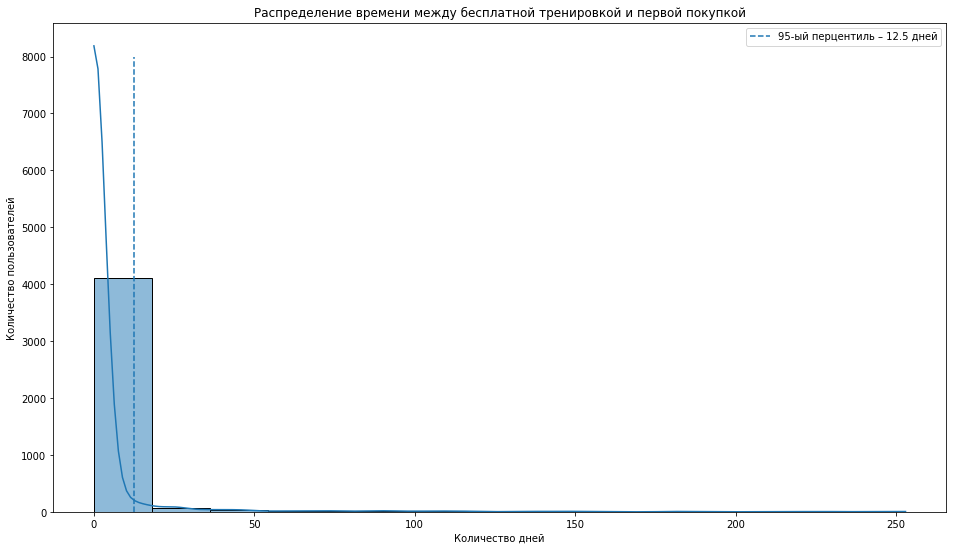

In [64]:
plt.figure(figsize=(16,9))
sns.histplot(user_info['date_diff'], kde=True)
plt.vlines(perc_95, ymin = 0, ymax = 8000, linestyles = 'dashed', label = f'95-ый перцентиль – {perc_95} дней')
plt.title('Распределение времени между бесплатной тренировкой и первой покупкой')
plt.xlabel('Количество дней')
plt.ylabel('Количество пользователей')
plt.legend()
plt.show()

✅Наша задача готова, мы знаем среднее время от бесплатной тренировки до оплаты и теперь можем отправить руководителю свои рекомендации!

<center><img src="https://cdn.skyeng.ru/resources/image/skills/python/lesson1-1/3.png" /> 

Одной из наших рекомендаций может быть проведение исследования самых медленных клиентов, чтобы понять, по каким причинам они откладывают покупку и почему они все же ее совершают. Зная это, мы сможем перестроть процесс взаимодействия с медленными клиентами, доводя до покупки большее число тех, кто пришел на бесплатную тренировку. 

А значит, нам нужно получить список самых медленных клиентов. Это можно сделать с помощью сортировки. 

In [ ]:
user_info.sort_values(by='date_diff',
                ascending=False)

,user_id,payment_date,client_id,start_at,date_diff
3324,2898097,2020-11-29 17:58:37,2898097,2020-03-21 15:40:00,253 days 02:18:37
2939,2512783,2020-09-29 18:46:35,2512783,2020-01-20 17:40:00,253 days 01:06:35
2837,2437438,2020-09-10 13:28:32,2437438,2020-01-06 13:00:00,248 days 00:28:32
2151,1851287,2020-10-31 14:07:05,1851287,2020-02-28 15:00:00,245 days 23:07:05
2805,2410208,2020-11-12 21:08:31,2410208,2020-03-19 18:20:00,238 days 02:48:31
...,...,...,...,...,...
2340,2019192,2020-02-03 16:30:57,2019192,2020-02-03 16:20:00,0 days 00:10:57
2552,2207471,2020-03-07 13:10:26,2207471,2020-03-07 13:00:00,0 days 00:10:26
1876,1573941,2020-04-16 17:09:27,1573941,2020-04-16 17:00:00,0 days 00:09:27
1537,1129927,2020-04-15 19:08:12,1129927,2020-04-15 19:00:00,0 days 00:08:12


In [48]:
# Среднее количество дней от вводного занятия до платежа
mean_value = user_info['date_diff'].mean()
mean_value

Timedelta('3 days 09:40:35.120580660')

### Задача:

Мы хотим создать новый столбец, который промаркерует всех пользователей как `Быстрый`, если с даты вводной тренировки до даты оплаты прошло меньше времени, чем в среднем, и `Медленный`в противном случае.


In [49]:
def checher(datediff_in_days):
    if datediff_in_days <= mean_value:
        return 'Быстрый'
    else:
        return 'Медленный'

In [50]:
#используем нашу функцию
user_info['client_type'] = user_info['date_diff'].apply(checher)

In [51]:
user_info.head()


,user_id,payment_date,client_id,start_at,date_diff,client_type
0,185,2020-04-02 22:31:46,185,2020-02-25 20:20:00,37 days,Медленный
1,1455,2020-02-03 16:50:18,1455,2020-01-28 16:20:00,6 days,Медленный
2,1558,2020-05-12 21:47:55,1558,2020-05-12 21:00:00,0 days,Быстрый
3,5312,2020-02-21 21:00:00,5312,2020-02-21 20:20:00,0 days,Быстрый
4,5804,2020-01-15 11:00:00,5804,2020-01-15 10:20:00,0 days,Быстрый


In [55]:
user_info['client_type'].value_counts(normalize=True)

Быстрый      0.906813
Медленный    0.093187
Name: client_type, dtype: float64

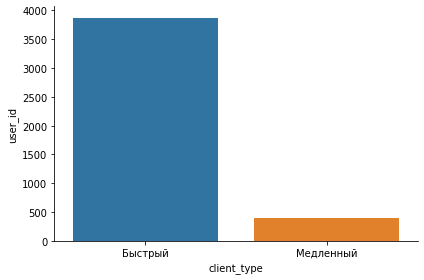

In [54]:
sns.catplot(x = 'client_type', 
            y = 'user_id', 
            data = user_info.groupby(by = 'client_type')['user_id'].count().reset_index(), 
            kind = "bar", 
            height = 4, # задаем размер графика 
            aspect = 1.5)

Выгрузим наш итоговый датасет и все исходные данные, с которыми мы работали, в один файл

In [ ]:
writer = pd.ExcelWriter('all_data.xlsx')

user_info.to_excel(writer, sheet_name='user_info')
payments.to_excel(writer, sheet_name='payments')
users.to_excel(writer, sheet_name='users')
workouts.to_excel(writer, sheet_name='workouts')

writer.save()

KeyboardInterrupt: 